## KDP 結晶の誘電率の周波数依存性

In [92]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import Normalize

In [93]:
C0 = 0.4678 * 8.85 / 0.142 * 10**(-14)

Temp = []
Temp.append(130)
Temp.append(140)
Temp.append(160)
Temp.append(180)
Temp.append(210)
Temp.append(240)
Temp.append(270)
Temp.append(295)
Temp = np.array(Temp)

nfile = 8

Frequency   = np.zeros((nfile, 999))
Epsilon1    = np.zeros((nfile, 999))
Epsilon2    = np.zeros((nfile, 999))

for i in range(nfile):
    df = pd.read_csv(f"2024_10_25/{Temp[i]}K.csv", encoding='shift_jis', skiprows=33, usecols = [2, 4, 5])

    Frequency[i]    = df.iloc[:,0].to_numpy() / 10**3
    Epsilon1[i]     = df.iloc[:,1].to_numpy() / C0
    Epsilon2[i]     = df.iloc[:,2].to_numpy() * Epsilon1[i]


Frequency_res = []
for i in range(nfile):
    Frequency_res.append(Frequency[i][np.argmax(Epsilon2[i])])

Frequency_res = np.array(Frequency_res)


ValueError: 130 is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

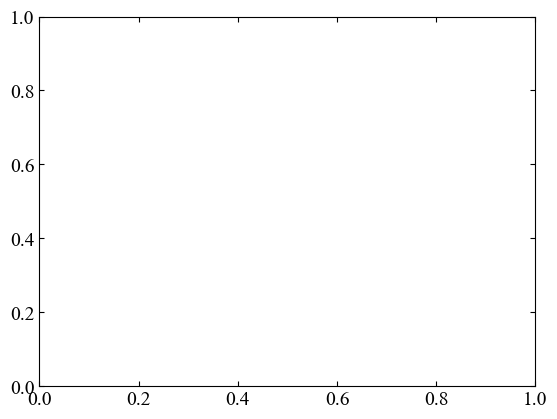

In [101]:
f = plt.figure()
ax1 = f.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

for i in range(0, 4):
    ax1.plot(Frequency[i],Epsilon1[i],
            c = Temp[i],
            cmap = "turbo",
            norm=Normalize(vmin=130, vmax=300),
            label = f"{Temp[i]} K")
ax1.legend()

# ax2 = ax1.twinx()
# for i in range(nfile):
#     plt.plot(Frequency[i], np.abs(Epsilon2[i]),scaley="log", label = f"{Temp[i]} K")
# plt.legend()
# plt.show()

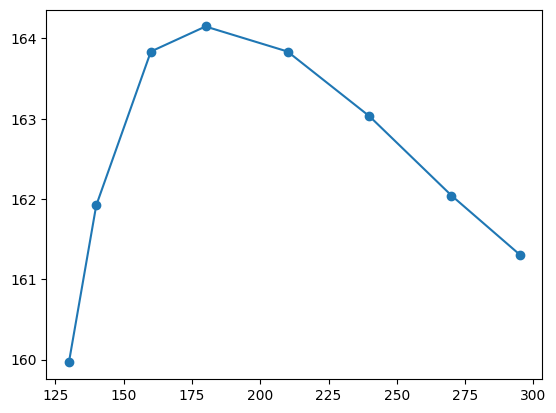

In [95]:
plt.scatter(Temp, Frequency_res)
plt.plot(Temp, Frequency_res)

In [ ]:
s